<a href="https://colab.research.google.com/github/FabioVCoelho/Univali/blob/master/PythonIntro/Trabalho2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nome: Fábio Volkmann Coelho

Disciplina: Introdução a Python

## Foi utilizado o dataset de jogos do kaggle https://www.kaggle.com/gregorut/videogamesales para o trabalho.

Será trabalhado somente com as vendas globais dos jogos.

Será trabalho com a empresa 'Square Enix'

E também com os jogos da 'Square Enix' do ano de 2016

Para o groupBy será utilizado a soma do global_sales juntamento com um count para saber quantos jogos daquele ano foram cadastrados na base, portanto a coluna de agrupamento será o ano.

Para os filtros e agrupamentos será feito um gráfico no matplotlib

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt 

In [ ]:
dataset = pd.read_csv("/content/drive/My Drive/Colab Notebooks/IntroPython/vgsales.csv")
dataset = dataset.drop(columns=['JP_Sales','EU_Sales','Other_Sales','NA_Sales'])
dataset.head()

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
0,1,Wii Sports,Wii,2006.0,Sports,Nintendo,82.74
1,2,Super Mario Bros.,NES,1985.0,Platform,Nintendo,40.24
2,3,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,35.82
3,4,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,33.00
4,5,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,31.37


In [ ]:
square_enix = dataset[dataset.Publisher.eq('Square Enix')]
square_enix.head()

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
147,148,Final Fantasy XII,PS2,2006.0,Role-Playing,Square Enix,5.95
169,170,Final Fantasy XIII,PS3,2009.0,Role-Playing,Square Enix,5.36
180,181,Dragon Quest VIII: Journey of the Cursed King,PS2,2004.0,Role-Playing,Square Enix,5.21
255,256,Kingdom Hearts II,PS2,2005.0,Role-Playing,Square Enix,4.33
424,425,Crisis Core: Final Fantasy VII,PSP,2007.0,Role-Playing,Square Enix,3.19


In [ ]:
dataset[dataset.Year.eq(2016.0)].head()

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
221,222,FIFA 17,PS4,2016.0,Sports,Electronic Arts,4.77
271,272,Uncharted 4: A Thief's End,PS4,2016.0,Shooter,Sony Computer Entertainment,4.20
351,352,Tom Clancy's The Division,PS4,2016.0,Shooter,Ubisoft,3.61
770,772,Far Cry: Primal,PS4,2016.0,Action,Ubisoft,2.13
845,847,Tom Clancy's The Division,XOne,2016.0,Shooter,Ubisoft,2.01


In [ ]:
dataset_square_enix_ano = dataset[dataset.Publisher.eq('Square Enix') & dataset.Year.eq(2016.0)]
dataset_square_enix_ano.head()

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
3221,3223,Dragon Quest Monsters Joker 3,3DS,2016.0,Role-Playing,Square Enix,0.63
5096,5098,Life is Strange,PS4,2016.0,Adventure,Square Enix,0.37
5499,5501,Deus Ex: Mankind Divided,PS4,2016.0,Role-Playing,Square Enix,0.33
5922,5924,Star Ocean 5: Integrity and Faithlessness,PS4,2016.0,Role-Playing,Square Enix,0.30
5929,5931,Dragon Quest Builders: Revive Alefgard,PSV,2016.0,Role-Playing,Square Enix,0.30


In [ ]:
dataset_grouped_by = dataset.groupby('Year')['Global_Sales'].agg(Sum_Global_Sales='sum',Count_Games='count').sort_values(by=['Year']).reset_index()
dataset_grouped_by.head()

,Year,Sum_Global_Sales,Count_Games
0,1980.0,11.38,9
1,1981.0,35.77,46
2,1982.0,28.86,36
3,1983.0,16.79,17
4,1984.0,50.36,14


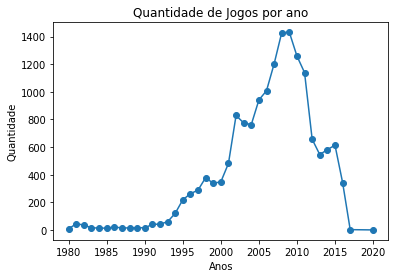

In [ ]:
plt.plot(dataset_grouped_by.Year,dataset_grouped_by.Count_Games, label='Quantidade de Jogos', marker="o")
plt.title("Quantidade de Jogos por ano")
plt.xlabel("Anos")
plt.ylabel("Quantidade")
plt.show()

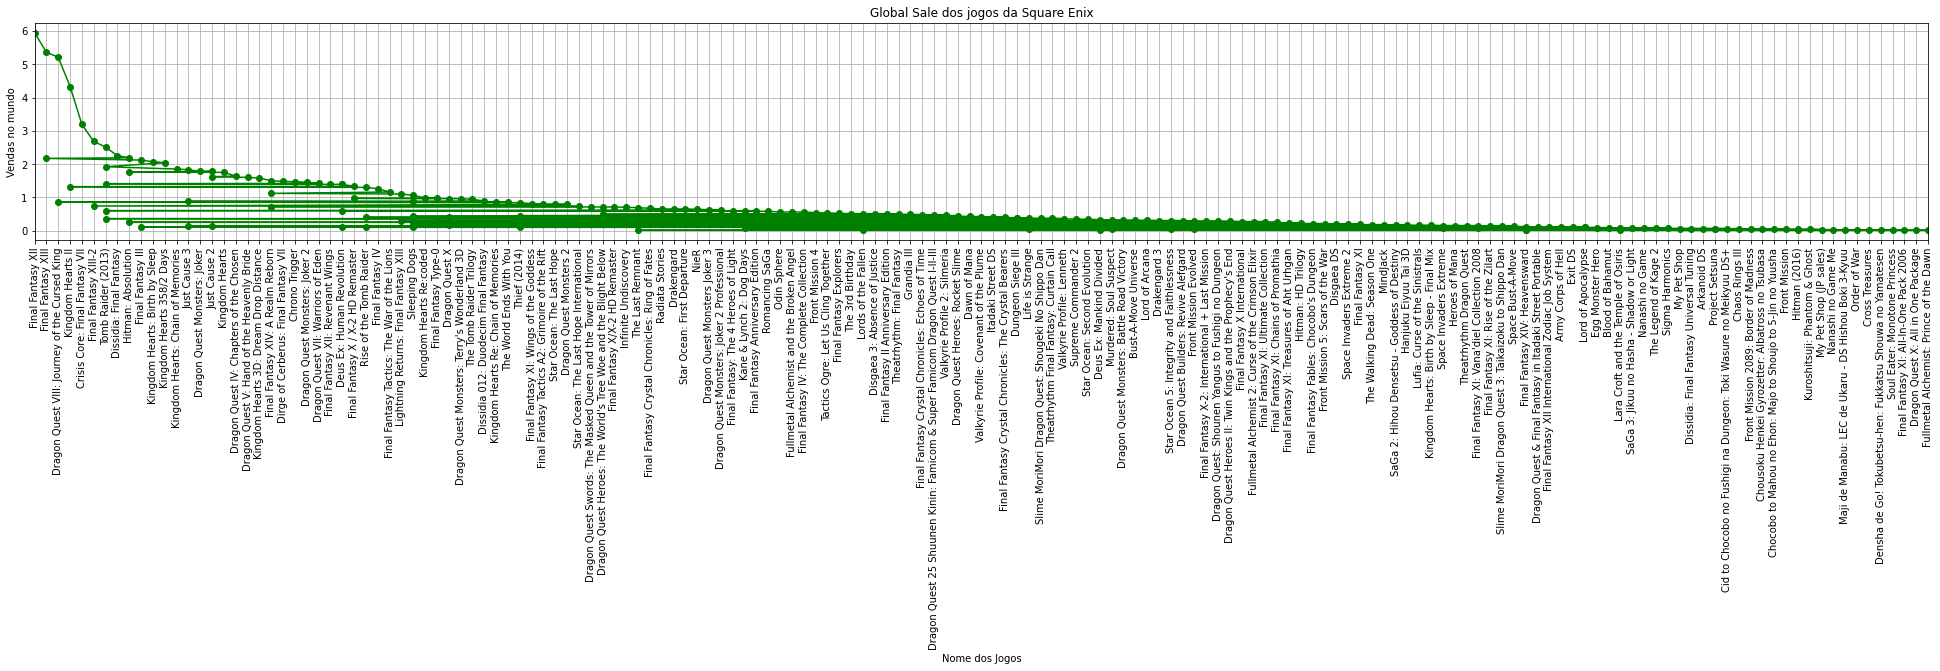

In [ ]:
plt.plot(square_enix.Name,square_enix.Global_Sales,'g', marker="o")
plt.title("Global Sale dos jogos da Square Enix")
plt.xlabel("Nome dos Jogos")
plt.xticks(rotation=90)
plt.ylabel("Vendas no mundo")


N = 200
plt.grid()
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*N+2*m
margin = m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])


plt.show()

## Como o gráfico ficou muito grande, separei o mesmo em 3 porções para mostrar em 3 gráficos diferentes

In [ ]:
size_square_enix = len(square_enix)
portion = int(size_square_enix/3)
first_portion = square_enix[:portion]
second_portion = square_enix[portion:portion * 2]
third_portion = square_enix[portion * 2: size_square_enix]
portions = [first_portion, second_portion, third_portion]

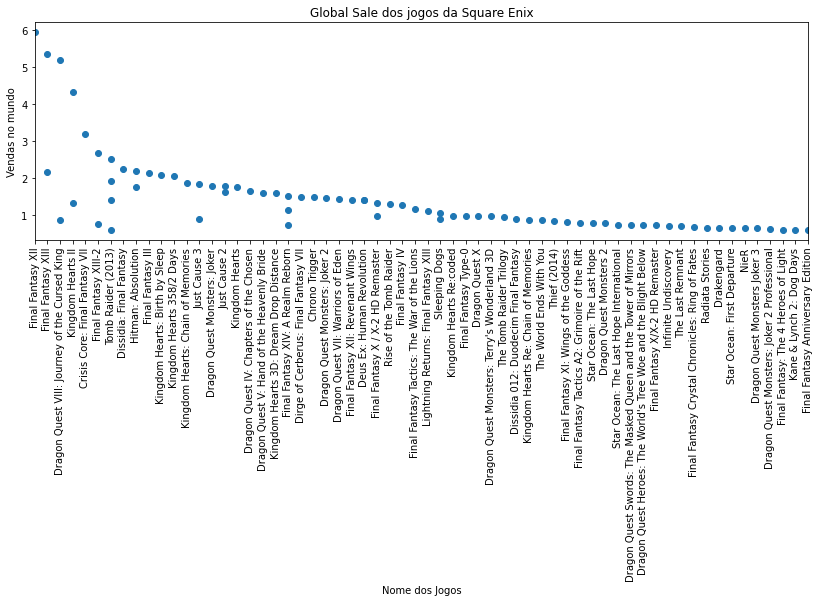

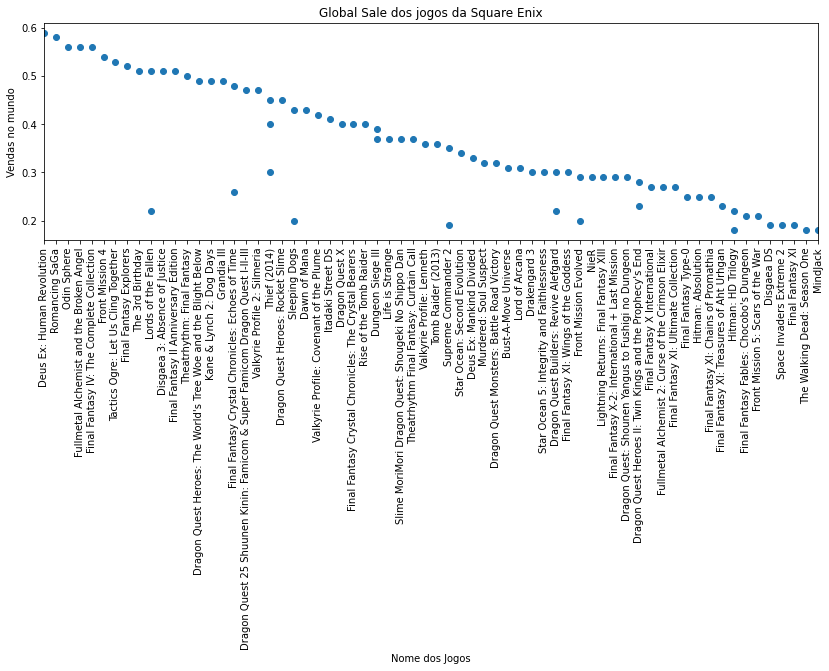

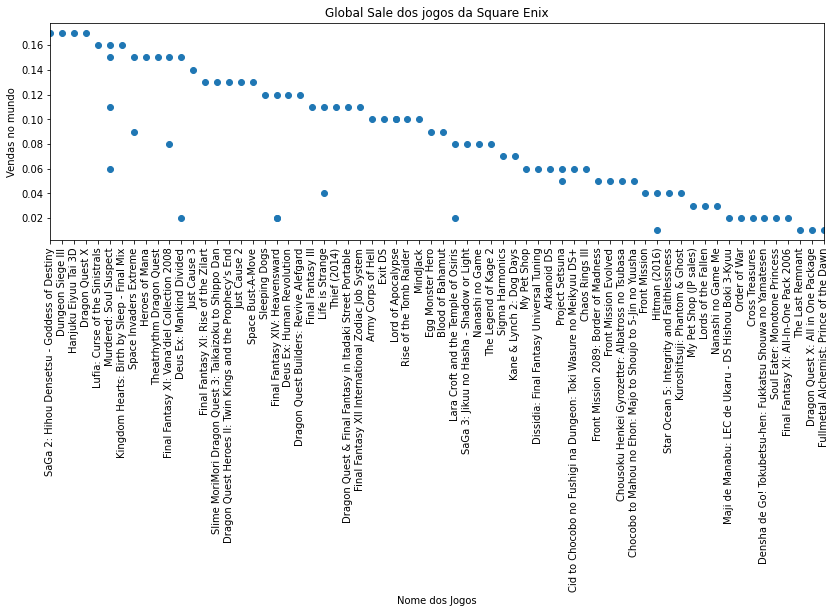

In [ ]:
for portion in portions:
  plt.plot(portion.Name,portion.Global_Sales, marker="o", linestyle = 'None')
  plt.title("Global Sale dos jogos da Square Enix")
  plt.xlabel("Nome dos Jogos")
  plt.xticks(rotation=90)
  
  plt.ylabel("Vendas no mundo")

  N = 80
  plt.gca().margins(x=0)
  plt.gcf().canvas.draw()
  tl = plt.gca().get_xticklabels()
  maxsize = max([t.get_window_extent().width for t in tl])
  m = 0.2 # inch margin
  s = maxsize/plt.gcf().dpi*N+2*m
  margin = m/plt.gcf().get_size_inches()[0]
  plt.gcf().subplots_adjust(left=margin, right=1.-margin)
  plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
  plt.show()


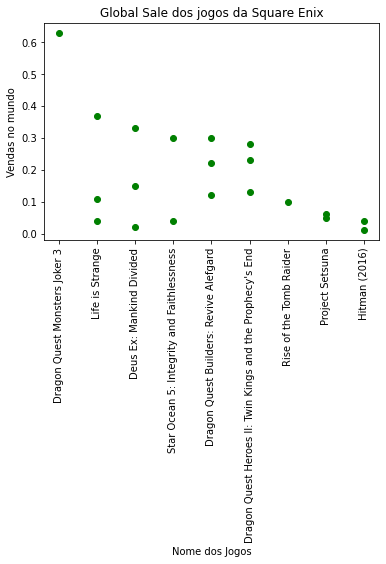

In [ ]:
plt.plot(dataset_square_enix_ano.Name,dataset_square_enix_ano.Global_Sales,'g', marker="o", linestyle = 'None')
plt.title("Global Sale dos jogos da Square Enix")
plt.xlabel("Nome dos Jogos")
plt.xticks(rotation=90)
plt.ylabel("Vendas no mundo")
plt.show()


### Verificando pelo gráfico, existem diversos valores para o mesmo jogo, analisando pelo dataframe, foi analisado que os valores são para plataformas diferentes.

In [ ]:
dataset_square_enix_ano[dataset_square_enix_ano.Name.eq('Life is Strange')]

,Rank,Name,Platform,Year,Genre,Publisher,Global_Sales
5096,5098,Life is Strange,PS4,2016.0,Adventure,Square Enix,0.37
10047,10049,Life is Strange,XOne,2016.0,Adventure,Square Enix,0.11
13562,13564,Life is Strange,PC,2016.0,Adventure,Square Enix,0.04


#### Para analisar melhor as vendas dos jogos independentes da plataforma, será feita um groupBy pelo nome dos jogos e será refeito o gráfico.

In [ ]:
dataset_square_enix_ano_grouped = dataset_square_enix_ano.groupby('Name')['Global_Sales'].agg(Sum_Global_Sales='sum').reset_index()
dataset_square_enix_ano_grouped.head()

,Name,Sum_Global_Sales
0,Deus Ex: Mankind Divided,0.50
1,Dragon Quest Builders: Revive Alefgard,0.64
2,Dragon Quest Heroes II: Twin Kings and the Pro...,0.64
3,Dragon Quest Monsters Joker 3,0.63
4,Hitman (2016),0.05


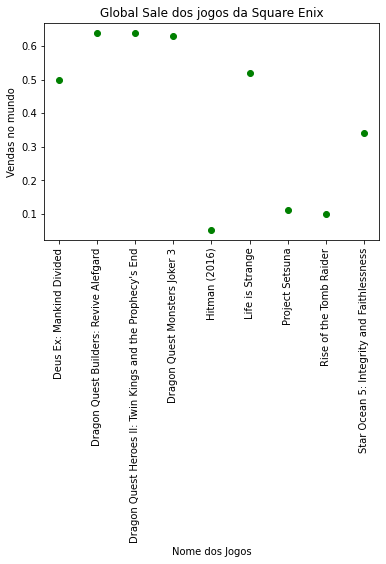

In [ ]:
plt.plot(dataset_square_enix_ano_grouped.Name,dataset_square_enix_ano_grouped.Sum_Global_Sales,'g', marker="o", linestyle = 'None')
plt.title("Global Sale dos jogos da Square Enix")
plt.xlabel("Nome dos Jogos")
plt.xticks(rotation=90)
plt.ylabel("Vendas no mundo")
plt.show()

#### Fazendo o agrupamento por nome e somando os valores do Global_Sale foi verificado que os valores de diversos jogos ficaram mais próximos ao 'Dragon Quest Monsters Joker 3' que possuia o maior valor entre os jogos da square enix do ano de 2016